In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data = pd.read_csv('../data/sales_data.csv', sep='\t')
data.columns = data.columns.str.strip()
data.head()

,Month,Product,Sales
0,Jan,Product A,120
1,Jan,Product B,150
2,Jan,Product C,100
3,Jan,Product D,130
4,Jan,Product E,90


In [8]:
data['Sales'].describe()


count     60.000000
mean     168.500000
std       42.078418
min       90.000000
25%      140.000000
50%      170.000000
75%      200.000000
max      260.000000
Name: Sales, dtype: float64

In [9]:
monthly_sales = data.groupby('Month')['Sales'].sum()
monthly_growth = monthly_sales.pct_change().fillna(0) * 100
monthly_sales, monthly_growth.round(2)

(Month
 Apr     720
 Aug     910
 Dec    1110
 Feb     640
 Jan     590
 Jul     860
 Jun     810
 Mar     680
 May     760
 Nov    1060
 Oct    1010
 Sep     960
 Name: Sales, dtype: int64,
 Month
 Apr     0.00
 Aug    26.39
 Dec    21.98
 Feb   -42.34
 Jan    -7.81
 Jul    45.76
 Jun    -5.81
 Mar   -16.05
 May    11.76
 Nov    39.47
 Oct    -4.72
 Sep    -4.95
 Name: Sales, dtype: float64)

In [10]:
best_month = monthly_sales.idxmax()
best_product = data.groupby('Product')['Sales'].sum().idxmax()
print(f"Best Month: {best_month}")
print(f"Best-Selling Product: {best_product}")

Best Month: Dec
Best-Selling Product: Product B


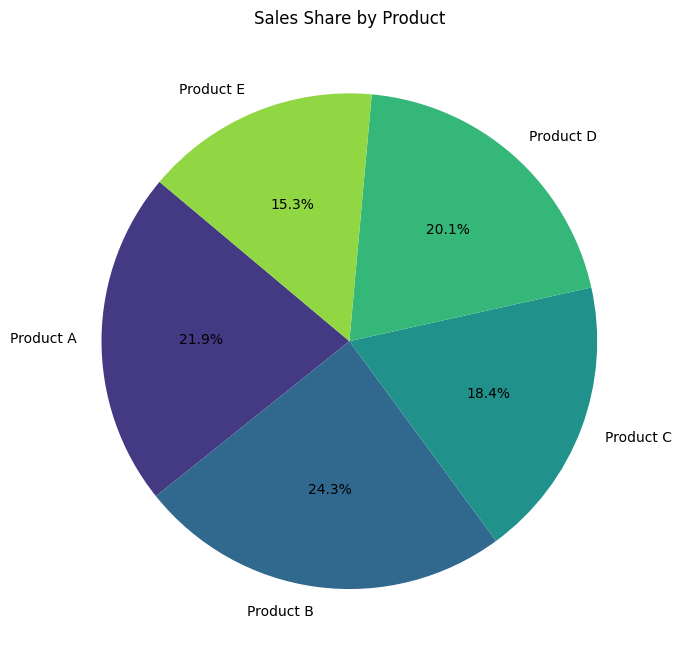

In [11]:
total_sales = data.groupby('Product')['Sales'].sum()
sales_share = (total_sales / total_sales.sum() * 100).round(2)

plt.figure(figsize=(7,7))
plt.pie(sales_share, labels=sales_share.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', n_colors=len(sales_share)))
plt.title('Sales Share by Product')
plt.tight_layout()
plt.show()

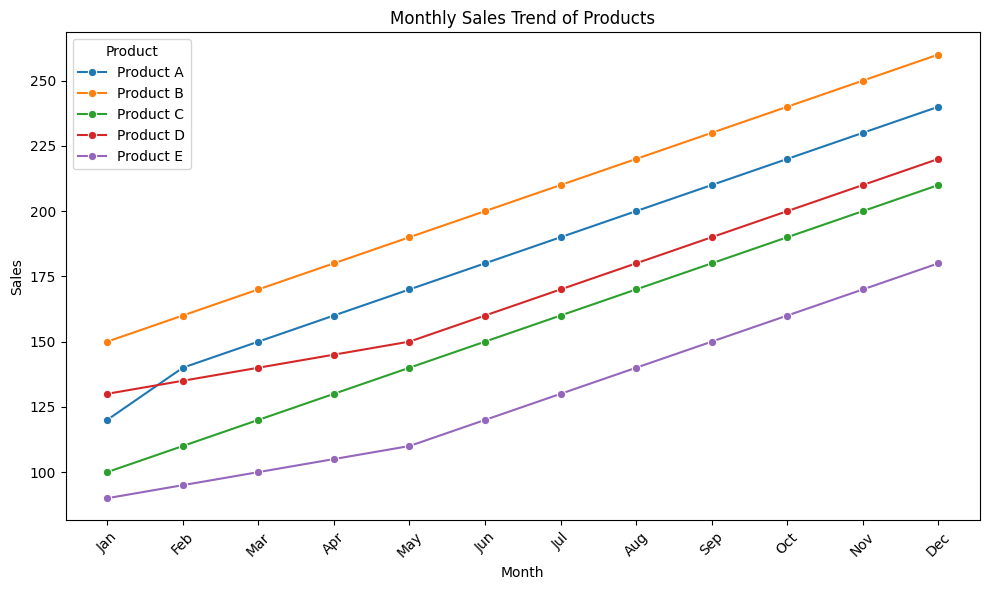

In [12]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x='Month', y='Sales', hue='Product', marker='o')
plt.title('Monthly Sales Trend of Products')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Product')
plt.tight_layout()
plt.show()

In [13]:
top_products = data.groupby('Month').apply(lambda x: x.loc[x['Sales'].idxmax(), ['Product', 'Sales']])
top_products


C:\Users\H.P\AppData\Local\Temp\ipykernel_2836\3169387376.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products = data.groupby('Month').apply(lambda x: x.loc[x['Sales'].idxmax(), ['Product', 'Sales']])


,Product,Sales
Month,,
Apr,Product B,180
Aug,Product B,220
Dec,Product B,260
Feb,Product B,160
Jan,Product B,150
Jul,Product B,210
Jun,Product B,200
Mar,Product B,170
May,Product B,190


In [14]:
os.makedirs('../output', exist_ok=True)

# Ensure top_products index matches monthly_sales index
top_products_reset = top_products.reset_index()
top_products_reset = top_products_reset.set_index('Month').reindex(monthly_sales.index)

summary = pd.DataFrame({
    'Total Sales': monthly_sales,
    'Growth Rate (%)': monthly_growth.round(2),
    'Top Product': top_products_reset['Product'],
    'Top Product Sales': top_products_reset['Sales']
})

summary.to_csv('../output/monthly_summary.csv')
summary

,Total Sales,Growth Rate (%),Top Product,Top Product Sales
Month,,,,
Apr,720,0.00,Product B,180
Aug,910,26.39,Product B,220
Dec,1110,21.98,Product B,260
Feb,640,-42.34,Product B,160
Jan,590,-7.81,Product B,150
Jul,860,45.76,Product B,210
Jun,810,-5.81,Product B,200
Mar,680,-16.05,Product B,170
May,760,11.76,Product B,190
